### Student Details

Student name: Vilohit Keshava Murthy Achar

Student ID: 23077751

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
file_path = "/content/iris_data.csv"

In [3]:
import pandas as pd
iris_df = pd.read_csv(file_path, header=0)
iris_df.head

<bound method NDFrame.head of      sepal_length  sepa_width  petal_length  petal_width           class
0             5.1         3.5           1.4          0.2     Iris-setosa
1             4.9         3.0           1.4          0.2     Iris-setosa
2             4.7         3.2           1.3          0.2     Iris-setosa
3             4.6         3.1           1.5          0.2     Iris-setosa
4             5.0         3.6           1.4          0.2     Iris-setosa
..            ...         ...           ...          ...             ...
145           6.7         3.0           5.2          2.3  Iris-virginica
146           6.3         2.5           5.0          1.9  Iris-virginica
147           6.5         3.0           5.2          2.0  Iris-virginica
148           6.2         3.4           5.4          2.3  Iris-virginica
149           5.9         3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [4]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [5]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # Cost function for logistic regression
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)


        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # Clipping z value for stability
        z = np.clip(z, -250, 250)
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)




In [6]:
filtered_df = iris_df[(iris_df['class'] == 'Iris-versicolor') | (iris_df['class'] == 'Iris-setosa')]


X = filtered_df[['sepal_length', 'petal_length']].values
y = np.where(filtered_df['class'] == 'Iris-setosa', 0, 1)  # Convert to 0 for setosa and 1 for versicolor

# Train the algorithm
model = LogisticRegressionGD(eta=0.01, epochs=500)
model.train(X, y)

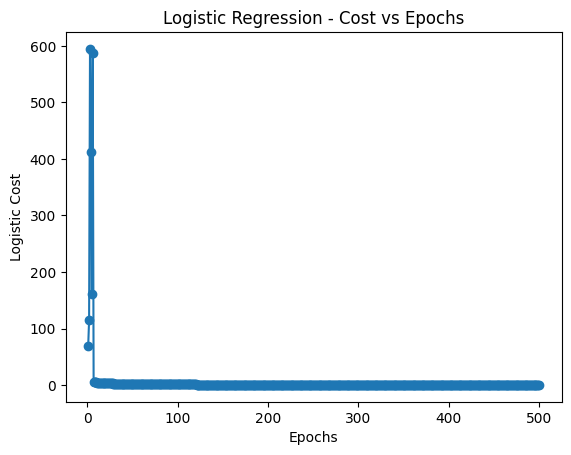

In [7]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)


    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)


    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])


    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)


    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax


plt.plot(range(1, len(model.cost_) + 1), model.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.title('Logistic Regression - Cost vs Epochs')
plt.show()



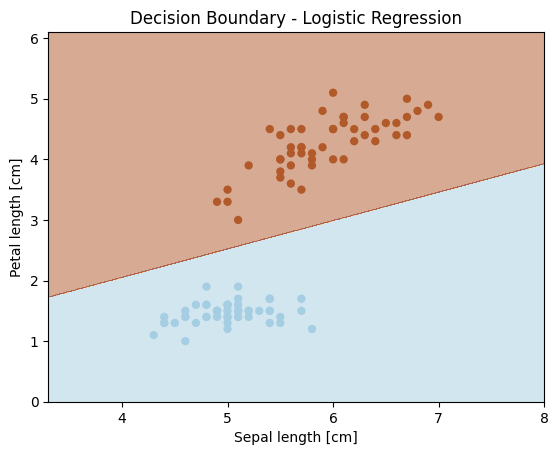

In [8]:
plot_decision_boundary(X, y, model)
plt.title('Decision Boundary - Logistic Regression')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = iris_df[['petal_length', 'petal_width']].values
y = iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

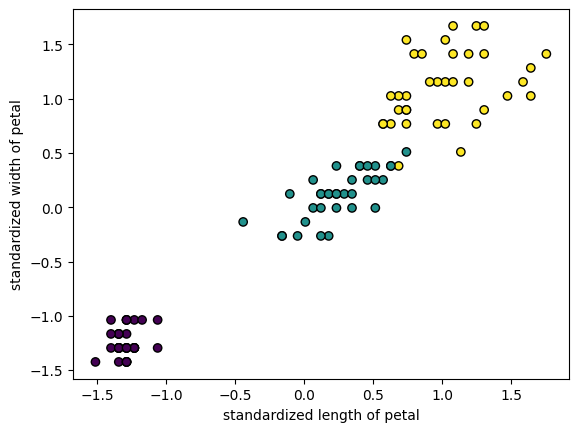

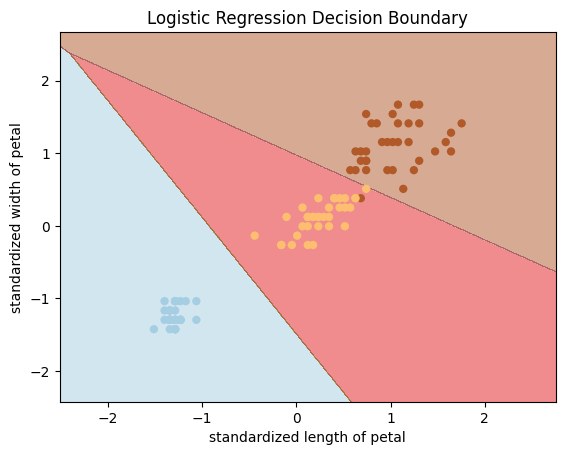

Accuracy: 0.9111


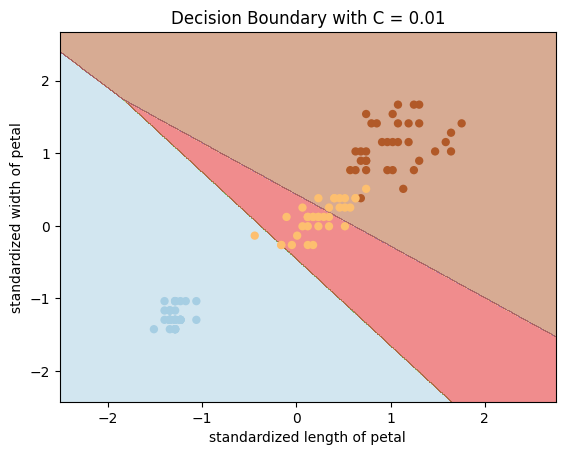

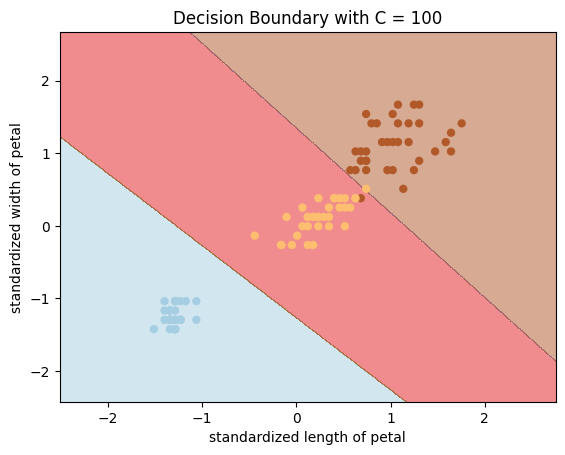

In [10]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.show()

lr = LogisticRegression(random_state=42)
lr.fit(X_train_std, y_train)

plot_decision_boundary(X_train_std, y_train, lr)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.show()


y_pred = lr.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


for value in [0.01, 100]:
    lr = LogisticRegression(C=value, random_state=42)
    lr.fit(X_train_std, y_train)
    plot_decision_boundary(X_train_std, y_train, lr)
    plt.title(f'Decision Boundary with C = {value}')
    plt.xlabel('standardized length of petal')
    plt.ylabel('standardized width of petal')
    plt.show()

<span style="color:red">Insert your text answers below</span>.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

Scaled training data:
 [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312 ]
 [ 0.

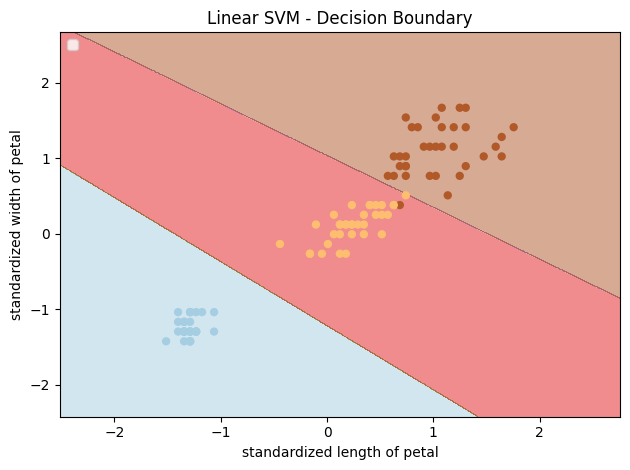

Accuracy: 0.9111111111111111


In [11]:


from sklearn.svm import SVC

X = iris_df[['petal_length', 'petal_width']].values
y = iris_df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("Scaled training data:\n", X_train_std)
print("Scaled test data:\n", X_test_std)


svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_std, y_train)


plot_decision_boundary(X_train_std, y_train, svm)
plt.title('Linear SVM - Decision Boundary')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

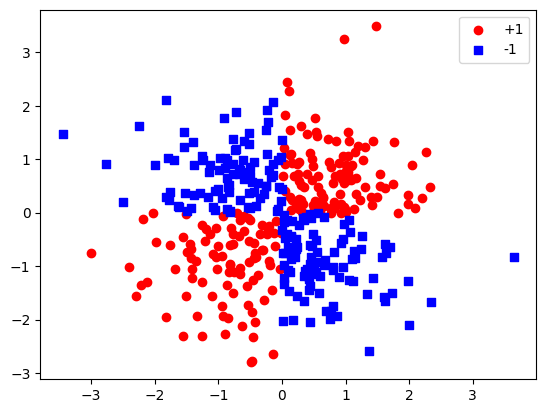

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

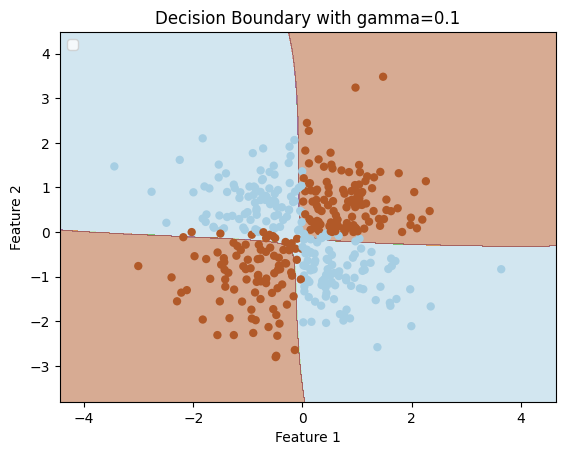

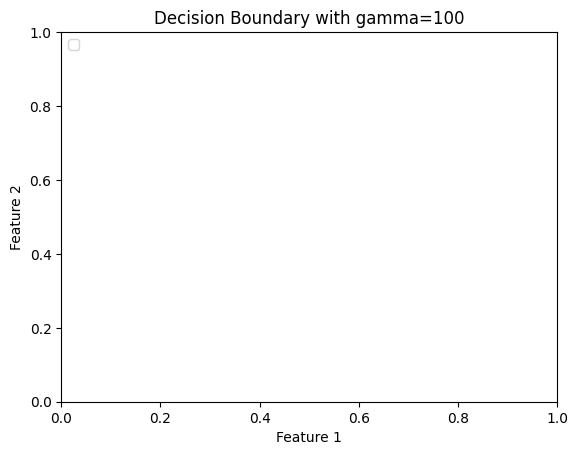

The decision boundary gets overfitted (too sensitive to individual data points) with a high gamma value.

This makes the prediction less generalizable to fresh data and causes it to capture noise.


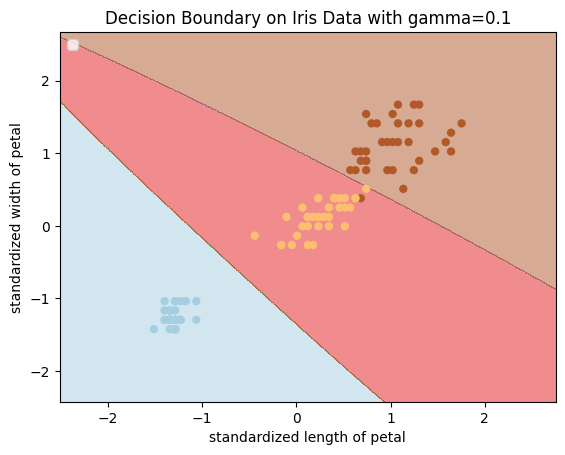

In [13]:

svm_rbf = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_rbf.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, svm_rbf)
plt.title('Decision Boundary with gamma=0.1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

svm_rbf_high_gamma = SVC(kernel='rbf', gamma=100, random_state=42)
svm_rbf_high_gamma.fit(X_r, y_r)

plt.title('Decision Boundary with gamma=100')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


print("The decision boundary gets overfitted (too sensitive to individual data points) with a high gamma value.")
print("\nThis makes the prediction less generalizable to fresh data and causes it to capture noise.")


svm_rbf_iris = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_rbf_iris.fit(X_train_std, y_train)

plot_decision_boundary(X_train_std, y_train, svm_rbf_iris)
plt.title('Decision Boundary on Iris Data with gamma=0.1')
plt.xlabel('standardized length of petal')
plt.ylabel('standardized width of petal')
plt.legend(loc='upper left')
plt.show()
